In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style='darkgrid') 
%matplotlib inline

# Importation des données

In [2]:
data = pd.read_csv('salary_data.csv', delimiter=',')
data.head()

,Horodateur,Quel est le titre exact de votre post ? Ex : Développeur Mobile IOS,Combien d'années d'expériences avez-vous en Entreprise?,Quel était votre premier salaire en FCFA au Bénin ?,Quel est votre salaire actuel en FCFA au Bénin ?,Êtes-vous satisfait de votre rémunération mensuelle ?
0,11/06/2021 16:22:47,Developeur Backend,1 an,125000,125000,2
1,11/06/2021 16:50:34,IT & Data Analyste,3 à 5 ans,50000,420000,1
2,11/06/2021 17:11:11,Développeur Android et python,2 ans,150000,150000,3
3,11/06/2021 19:51:58,Développeur Web Frontend,Moins d'un an,100000,180000,2
4,11/06/2021 20:13:44,Full stack web developer,1 an,150000,200000,3


In [3]:
data.shape

(38, 6)

# Nettoyage des données

Nous pouvons retirer la colonne **Horodateur**

In [4]:
data = data.drop(columns="Horodateur") # ou utiliser del data['Horodateur']

data

,Quel est le titre exact de votre post ? Ex : Développeur Mobile IOS,Combien d'années d'expériences avez-vous en Entreprise?,Quel était votre premier salaire en FCFA au Bénin ?,Quel est votre salaire actuel en FCFA au Bénin ?,Êtes-vous satisfait de votre rémunération mensuelle ?
0,Developeur Backend,1 an,125000,125000,2
1,IT & Data Analyste,3 à 5 ans,50000,420000,1
2,Développeur Android et python,2 ans,150000,150000,3
3,Développeur Web Frontend,Moins d'un an,100000,180000,2
4,Full stack web developer,1 an,150000,200000,3
5,IT Project Manager,3 à 5 ans,160.000FCFA,300.000FCFA,1
6,UX/UI DESIGNER,2 ans,50.000FCFA,100.000FCFA,1
7,Développeur Front-end,Moins d'un an,100000,180000,1
8,Développeur Angular,3 à 5 ans,60000,250000,2
9,Développeur web,3 à 5 ans,50000,500000,4


Essayons de renomer les differentes colonnes,les noms actuels etabt trop long

In [5]:
columns = ['poste', 'experience', 'salaire_debut', 'salaire_actuel', 'satisfaction']
data.columns = columns

In [6]:
data.head()

,poste,experience,salaire_debut,salaire_actuel,satisfaction
0,Developeur Backend,1 an,125000,125000,2
1,IT & Data Analyste,3 à 5 ans,50000,420000,1
2,Développeur Android et python,2 ans,150000,150000,3
3,Développeur Web Frontend,Moins d'un an,100000,180000,2
4,Full stack web developer,1 an,150000,200000,3


Verifions le type de données de chasuer colonne

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   poste           38 non-null     object
 1   experience      38 non-null     object
 2   salaire_debut   38 non-null     object
 3   salaire_actuel  38 non-null     object
 4   satisfaction    38 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


La colonne est de type int. Examinons les colonnes salures_debut et salaire_actuel qui devrait etre egalement de type int

In [8]:
data['salaire_debut'].unique()

array(['125000', '50000', '150000', '100000', '160.000FCFA', '50.000FCFA',
       '60000', '30mille', '120000', '50.000', '30.000', '40000',
       '350000', '400000', '25000', '200000', '160000', '50.000 FCFA',
       '75.000', '400.000', '73325', '0'], dtype=object)

In [9]:
data['salaire_actuel'].unique()

array(['125000', '420000', '150000', '180000', '200000', '300.000FCFA',
       '100.000FCFA', '250000', '500000', '400000', '150', '380000',
       '438000', '300000', '150.000', '180.000', '1000000', '50000',
       '100000', '978344', '200.000fcfa', '375000', '160.000', '500.000',
       '225000', '40000'], dtype=object)

On remarque que :
- Nous disposons d'un grand nombre de salaire different, ce qui est bien pour notre analyse
- Certaines reponse ont la devise fcfa, ce qu'il faudra effacer
- Certaines reponses ont un point à l'interieur ou simplement la seconde partie en tout lettre pour facilieter la lecture du montant. Il faut les enlever et les nettoyer egalement.

Ecrivons la fonction de nettoyage :

In [10]:
def clean_salary(salary):
    salary = salary.lower() #transformer tous les FCFA en fcfa
    to_remove = ['fcfa', '.', 'mille']

    for chaine in to_remove:
        if chaine == 'mille':
            salary = salary.replace(chaine,'000')
        salary = salary.replace(chaine, '')
    return salary

In [11]:
data['salaire_debut'] = data['salaire_debut'].apply(clean_salary)
data['salaire_actuel'] = data['salaire_actuel'].apply(clean_salary)

In [12]:
data['salaire_debut'].unique()

array(['125000', '50000', '150000', '100000', '160000', '60000', '30000',
       '120000', '40000', '350000', '400000', '25000', '200000', '50000 ',
       '75000', '73325', '0'], dtype=object)

In [13]:
data['salaire_actuel'].unique()

array(['125000', '420000', '150000', '180000', '200000', '300000',
       '100000', '250000', '500000', '400000', '150', '380000', '438000',
       '1000000', '50000', '978344', '375000', '160000', '225000',
       '40000'], dtype=object)

Désormais, nous n'avons plus que des nombres. Mais ce n'est pas fini. Nous avons un outlier 150 dans la colonne salaire actuel et de 0 dans le salire debut. Examinons les autres reponses de ces personnes

In [14]:
data[data['salaire_actuel'] == '150'] 

,poste,experience,salaire_debut,salaire_actuel,satisfaction
11,Lead developer,2 ans,30000,150,1


Un salaire début de 30000 et un salaire actuel de 150 est invraisemblable pour un Lead developer avec 2 ans d'expérience. Il s'agit probalement de 150 000 FCFA. Modifions cela

In [15]:
data.at[11,'salaire_actuel'] = '150000'

In [16]:
data.iloc[11]

poste             Lead developer
experience                 2 ans
salaire_debut              30000
salaire_actuel            150000
satisfaction                   1
Name: 11, dtype: object

In [17]:
data[data['salaire_debut'] == '0'] 

,poste,experience,salaire_debut,salaire_actuel,satisfaction
37,Développeur web,1 an,0,40000,1


Il s'agit là d'un développeur avec une année d'expérience. Un salaire début de 0 peut supposer qu'il s'agissait d'un stage non remunéré. On peut donc garder cette ligne telle.

Nous pouvons maintenant convertir ces colonnes de type object à int

In [18]:
data[['salaire_debut', 'salaire_actuel']] = data[['salaire_debut', 'salaire_actuel']].astype('int')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   poste           38 non-null     object
 1   experience      38 non-null     object
 2   salaire_debut   38 non-null     int32 
 3   salaire_actuel  38 non-null     int32 
 4   satisfaction    38 non-null     int64 
dtypes: int32(2), int64(1), object(2)
memory usage: 1.3+ KB


Considérons désormais la colonne expérience :

In [20]:
data['experience'].unique()

array(['1 an', '3 à 5 ans', '2 ans', "Moins d'un an", 'Plus de 5 ans',
       "Stagiaire, Moins d'un an", 'Stagiaire', 'Plus de 10 ans'],
      dtype=object)

Il s'agit de catégories donc on peut ne pas modifier cette catégorie.

C'est donc la fin de notre nettoyage de données. Nous pouvons désormais passé à une analyse exploratoire.

# Analyse exploratoire

In [21]:
data.head()

,poste,experience,salaire_debut,salaire_actuel,satisfaction
0,Developeur Backend,1 an,125000,125000,2
1,IT & Data Analyste,3 à 5 ans,50000,420000,1
2,Développeur Android et python,2 ans,150000,150000,3
3,Développeur Web Frontend,Moins d'un an,100000,180000,2
4,Full stack web developer,1 an,150000,200000,3


Commençons par les différents métiers en informatique qu'on a dans ce dataset :

In [22]:
data['poste'].unique()

array(['Developeur Backend', 'IT & Data Analyste',
       'Développeur Android et python', 'Développeur Web Frontend',
       'Full stack web developer', 'IT Project Manager ',
       'UX/UI DESIGNER ', 'Développeur Front-end', 'Développeur Angular',
       'Développeur web', 'DevOps', 'Lead developer',
       'Développeur Web Full Stack', 'Full Stack Dev',
       'Developer back-end', 'Développeur front end', 'Data Analyst ',
       'Frontend dev', 'Devops', 'Project Manager Junior', 'Data Analyst',
       'Développeur Web Backend', 'Chef de projet web et mobile',
       'Développeur web et mobile ', 'Développeur Web',
       'Big Data Manager', 'Manager', 'Développeur web et mobile',
       'Chef Division Applications et Base de Données',
       'Développeur Web FullStack et Mobile ',
       'Ingénieur réseau, système et securité', 'Développeur JEE',
       'Assistant technique ', 'Développeur Web (Back end et front end) '],
      dtype=object)

In [23]:
data['poste'].nunique()

34

Nous avons 34 entrées différentes qui peuvent être groupées en sous-catégories. Nous avons des désigner UX/UI, développeurs web, frontend, backend, fullstack, mobile, des Devops, des Data Analyst, des chefs de projets et autres. Nous allons essayer de faire des regroupements de ces différentes entrées selon les listes suivantes :

In [24]:
group = {
   
"dev_frontend" : ["Développeur Front-end", "Développeur Angular","Développeur front end", "Frontend dev", "Développeur Web Frontend"],
"dev_backend" : ["Developeur Backend", "Developer back-end", "Développeur Web Backend", "Développeur JEE"],
"fullstack" : ["Full stack web developer", "Développeur Web Full Stack", "Full Stack Dev", "Développeur Web FullStack et Mobile ", "Développeur Web (Back end et front end) "],
"dev_web" : ['Développeur web', "Développeur Web"],
"mobile" : ["Développeur web et mobile ", "Développeur web et mobile", "Développeur Android et python"],
"data_analyst" : ["Data Analyst ", "Data Analyst", "IT & Data Analyste"],
"manager" : ["IT Project Manager ", "Lead developer", "Project Manager Junior", "Big Data Manager", "Chef Division Applications et Base de Données", "Manager", "Chef de projet web et mobile"],
"reseau_sécurite" : ["Ingénieur réseau, système et securité"],
"devops" : ['DevOps', "Devops"],
"autres" : ['Assistant technique '],
"designer" : ['UX/UI DESIGNER ']

}

In [25]:
metiers = []

for i, row in data.iterrows():
    for metier in group:
        if row.poste in group[metier]:
            metiers.append(metier)
            break

In [26]:
data['metiers'] = metiers

In [27]:
data.head()

,poste,experience,salaire_debut,salaire_actuel,satisfaction,metiers
0,Developeur Backend,1 an,125000,125000,2,dev_backend
1,IT & Data Analyste,3 à 5 ans,50000,420000,1,data_analyst
2,Développeur Android et python,2 ans,150000,150000,3,mobile
3,Développeur Web Frontend,Moins d'un an,100000,180000,2,dev_frontend
4,Full stack web developer,1 an,150000,200000,3,fullstack


In [28]:
data['metiers'].unique()

array(['dev_backend', 'data_analyst', 'mobile', 'dev_frontend',
       'fullstack', 'manager', 'designer', 'dev_web', 'devops',
       'reseau_sécurite', 'autres'], dtype=object)

In [29]:
data.to_csv('salary.csv', index=False)

Nous avons désormais des sous-groupes de métiers informatiques qui peuvent nous permettre de mieux les connaitre et analyser. Vous pouvez modifier mon dictionnaire groupe pour avoir une autre type de groupes.

Nous allons continuer cette analyse en répondant à des questions pertinentes.

# Analyse globale des salaires en informatique

In [30]:
data.head()

,poste,experience,salaire_debut,salaire_actuel,satisfaction,metiers
0,Developeur Backend,1 an,125000,125000,2,dev_backend
1,IT & Data Analyste,3 à 5 ans,50000,420000,1,data_analyst
2,Développeur Android et python,2 ans,150000,150000,3,mobile
3,Développeur Web Frontend,Moins d'un an,100000,180000,2,dev_frontend
4,Full stack web developer,1 an,150000,200000,3,fullstack


In [31]:
data.shape

(38, 6)

### Les metiers

voici les differents metiers informatique que nous avons dans notre dataset

In [32]:
data['metiers'].unique()

array(['dev_backend', 'data_analyst', 'mobile', 'dev_frontend',
       'fullstack', 'manager', 'designer', 'dev_web', 'devops',
       'reseau_sécurite', 'autres'], dtype=object)

Determinons la proportions de chaque metier 

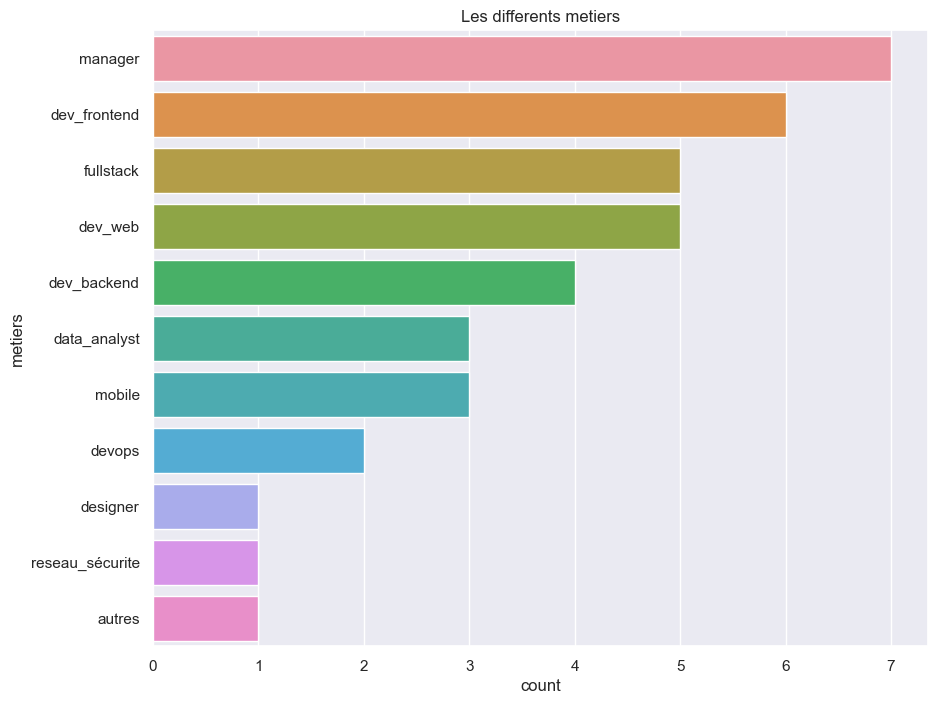

In [33]:
plt.figure(figsize=(10,8))
sns.countplot(y='metiers',
              data= data,
              order= data['metiers'].value_counts().index)
plt.title('Les differents metiers')
plt.savefig('metiers_count.png')
plt.show()

On remarque que le poste de manager qui comprend les chefs projets, lead developer et autres est le plus fréquent avec 7 reponses. S"en suivent les metiers de developpeur frontend, fullstack, backend. Il s'agit là réellement du métier le plus fréquent si on devrait les mettre dans un même groupe. Il est à noter que nous avons egalment des data analysts, devops, designer et ingenieurs réseau sécurité aussi mais en faible proportions.

jetons maintenant un coup d'oeil au nombre d'experience des informations de notre enquête :

### L'expérience

In [35]:
data['experience'].unique()

array(['1 an', '3 à 5 ans', '2 ans', "Moins d'un an", 'Plus de 5 ans',
       "Stagiaire, Moins d'un an", 'Stagiaire', 'Plus de 10 ans'],
      dtype=object)

etablissons l'ordre de ces differentes catrégories

In [38]:
exp_order = ["Plus de 10 ans", "Plus de 5 ans", "3 à 5 ans", "2 ans", "1 an", "Moins d'un an", "Stagiaire", "Stagiaire, Moins d'un an", ]

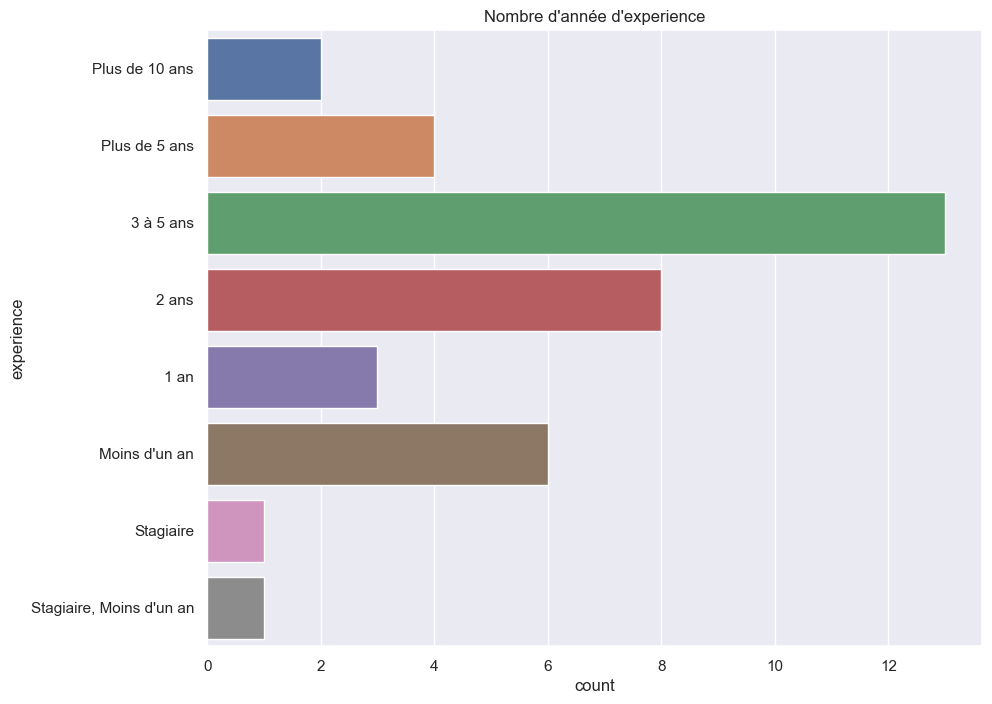

In [39]:
plt.figure(figsize=(10, 8))
sns.countplot(y = 'experience',
              data = data,
              order = exp_order)
plt.title("Nombre d'année d'experience")
plt.savefig('exp_count.png')
plt.show()

La plupart des informaticiens de notre dataset ont entre 3 et 5 ans d'expérience. Ceci parait normal vu le nombre de personnes à des postes managériales, possible après 3 ou 4 ans d'expériences. Nous avons en seconde position, plusieurs développeurs avec 2 ans d'expérience et en 3ème position ceux et celles qui viennent de débuter leur carrière avec moins d'un an d'expérience. Nous avons aussi 2 stagiaires. Cette diversité d'expérience peut nous permettre de mieux apprécier plus tard, les salaires et différents niveaux de satisfactions selon les groupes.

### Les salaires

Nous avons les salaires en début de carrière et les salaires actuels des 38 informaticiens de notre jeu de données. Quelle est la distribution des salaires ? Quel est le minimum ? maximum ? median ?

c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

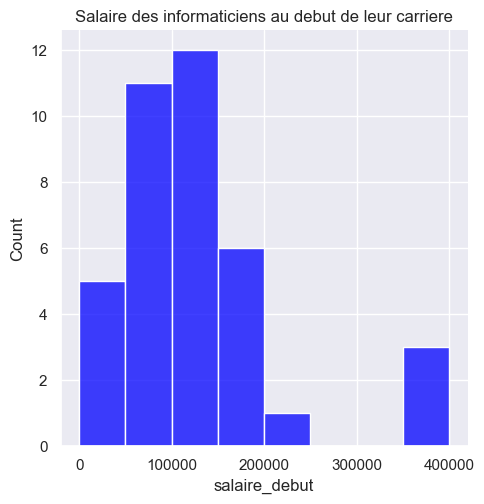

In [44]:
plt.figure(figsize=(10, 8))
sns.displot(data['salaire_debut'],kde=False, hue_norm=False, color="Blue")
plt.title("Salaire des informaticiens au debut de leur carriere")
plt.savefig('salaire_debut.png')
plt.show()

In [45]:
data["salaire_debut"].describe()

count        38.000000
mean     112982.236842
std       92605.979264
min           0.000000
25%       50000.000000
50%      100000.000000
75%      143750.000000
max      400000.000000
Name: salaire_debut, dtype: float64

Nous pouvons remarquer qu'au début de leur carrière, le salaire des informaticiens au Bénin est entre 50 000 et 150 000 avec la médiane à 100 000. Nous avons cependant quelques cas particuliers avec 0 et 400 000 comme salaire de débutant. Investiguons :

In [46]:
data[(data['salaire_debut']== 0) | (data['salaire_debut'] == 400000)]

,poste,experience,salaire_debut,salaire_actuel,satisfaction,metiers
23,Chef de projet web et mobile,3 à 5 ans,400000,1000000,3,manager
33,"Ingénieur réseau, système et securité",Plus de 5 ans,400000,500000,2,reseau_sécurite
37,Développeur web,1 an,0,40000,1,dev_web


Il s'agit donc d'un chef de projet Web et mobile et d'un Ingénieur réseau, dont le salaire au début était à 400 000. Depuis ceux-ci sont passés respectivement à 1 million et 500 000. Passons justement aux salaires actuels des informaticiens.

c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

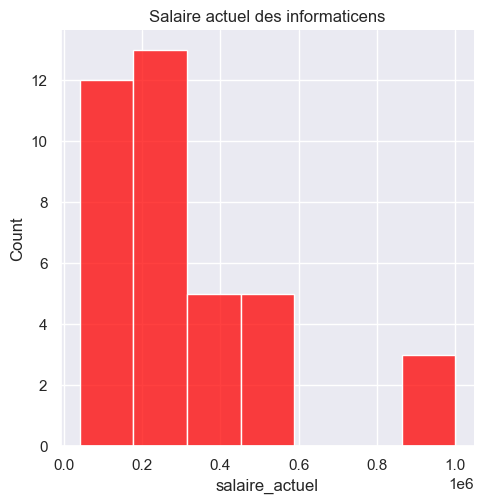

In [48]:
plt.figure(figsize=(10, 8))
sns.displot(data['salaire_actuel'], kde=False, color='red')
plt.title("Salaire actuel des informaticens")
plt.savefig("salaire_actuel.png")
plt.show()

In [49]:
data["salaire_actuel"].describe()

count         38.000000
mean      306745.894737
std       246525.329694
min        40000.000000
25%       150000.000000
50%       200000.000000
75%       415000.000000
max      1000000.000000
Name: salaire_actuel, dtype: float64